# Customer Churn Prediction

## 1. Business Understanding

The task at hand is to be able to predict wheather a customer is likely to churn or not. Customer churning, also known as customer attrition or customer defection, refers to the phenomenon where customers or clients discontinue their relationship with a company or business. In other words, it's the rate at which customers stop using a company's products or services and choose to go to a competitor or simply stop making purchases altogether.

 Customer churn is a critical metric for businesses across various industries because it directly impacts their revenue and profitability. High customer churn can be detrimental to a company's growth and sustainability, as acquiring new customers is often more expensive than retaining existing ones.

 The reasons for customer churn can vary and may include factors such as:

1. Poor customer service:  Negative experiences with customer support can lead to customers seeking alternatives.
2. Pricing issues: Customers might find the pricing of the product or service too high or might come across better deals elsewhere.
3. Lack of engagement: If customers feel neglected or not valued, they are more likely to switch to a competitor.
4. Changes in customer needs: As customer needs and preferences evolve, their current solution might no longer meet their requirements.
5. Competitive pressure: Aggressive marketing and better offers from competitors can entice customers to switch.
6. Relocation or other life changes: Sometimes, churn happens due to factors beyond the company's control, like a customer moving to a different location.
7. Dissatisfaction with the product or service: Customers might not be satisfied with the quality, features, or performance of what they purchased.

 Understanding the reasons for churn through data analysis and customer feedback is essential for implementing effective strategies to retain customers and build long-term relationships. In this challenge, as a data scientist of a bank, you are asked to analyze the past data and predict whether the customer will churn or not in the next 6 months. This would help the bank to have the right engagement with customers at the right time.

### 1.1 Business Objective

To predict if a customer will churn or not.

## Steps Performed
1. Loading and Understanding the data
2. Data Cleaning
3. Exploratory Data Analysis
4. Feature Engineering
5. Model Building
6. Model's Performance Comparison
7. Feature Importance
8. Conclusion
9. Recommendations

## 2. Data Understanding

### Data Dictionary.

| Variable    | Description    |
| ------- | -------------- |
| ID   | Unique Identifier of a row               |
| Age    | Age of the customer|
| Gender| Gender of the customer (Male and Female)  |
| Income| Yearly income of the customer |
| Balance| Average quarterly balance of the customer |
| Vintage No. | No. of years the customer is associated with bank |
| Transaction Status| Whether the customer has done any transaction in the past 3 months or not |
| Product Holdings| No. of product holdings with the bank  |
| Credit Card| Whether the customer has a credit card or not     |
| Credit Category | Category of a customer based on the credit score |
| Is_Churn (target variable)| Whether the customer will churn in next 6 months or not      |

In [37]:
# Importing libraries
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

warnings.simplefilter('ignore')
%matplotlib inline


In [38]:
# Loading the data
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [39]:
train.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,84e2fcc9,36,Female,5L - 10L,563266,4,0,1,0,Average,1
1,57fea15e,53,Female,Less than 5L,875572,2,1,1,1,Poor,0
2,8df34ef3,35,Female,More than 15L,701607,2,1,2,0,Poor,0
3,c5c0788b,43,Female,More than 15L,1393922,0,1,2,1,Poor,1
4,951d69c4,39,Female,More than 15L,893146,1,1,1,1,Good,1


In [40]:
test.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category
0,55480787,50,Female,More than 15L,1008636,2,1,2,1,Average
1,9aededf2,36,Male,5L - 10L,341461,2,0,2,1,Average
2,a5034a09,25,Female,10L - 15L,439460,0,0,2,1,Good
3,b3256702,41,Male,Less than 5L,28582,0,1,2,1,Poor
4,dc28adb5,48,Male,More than 15L,1104540,2,1,3+,0,Good


In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  6650 non-null   object 
 1   Age                 6650 non-null   int64  
 2   Gender              6650 non-null   object 
 3   Income              6650 non-null   object 
 4   Balance             6650 non-null   float64
 5   Vintage             6650 non-null   int64  
 6   Transaction_Status  6650 non-null   int64  
 7   Product_Holdings    6650 non-null   object 
 8   Credit_Card         6650 non-null   int64  
 9   Credit_Category     6650 non-null   object 
 10  Is_Churn            6650 non-null   int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 571.6+ KB


In [42]:
train.describe()

,Age,Balance,Vintage,Transaction_Status,Credit_Card,Is_Churn
count,6650,6650,6650,6650,6650,6650
mean,41,804595,2,1,1,0
std,10,515755,1,0,0,0
min,21,63,0,0,0,0
25%,34,392264,1,0,0,0
50%,40,764939,2,1,1,0
75%,47,1147124,3,1,1,0
max,72,2436616,5,1,1,1


In [43]:
train.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,84e2fcc9,36,Female,5L - 10L,563266,4,0,1,0,Average,1
1,57fea15e,53,Female,Less than 5L,875572,2,1,1,1,Poor,0
2,8df34ef3,35,Female,More than 15L,701607,2,1,2,0,Poor,0
3,c5c0788b,43,Female,More than 15L,1393922,0,1,2,1,Poor,1
4,951d69c4,39,Female,More than 15L,893146,1,1,1,1,Good,1


In [44]:
# Dropping the unecessary columns
train.drop('ID', axis=1, inplace=True)
test.drop('ID', axis=1, inplace=True)

In [45]:
train.head()

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,36,Female,5L - 10L,563266,4,0,1,0,Average,1
1,53,Female,Less than 5L,875572,2,1,1,1,Poor,0
2,35,Female,More than 15L,701607,2,1,2,0,Poor,0
3,43,Female,More than 15L,1393922,0,1,2,1,Poor,1
4,39,Female,More than 15L,893146,1,1,1,1,Good,1


In [46]:
print('Shape of the train data is:', train.shape)
print('Shape of the test data is:', test.shape)

Shape of the train data is: (6650, 10)
Shape of the test data is: (2851, 9)


After checking the structure of the data, we can observe the following
1. The train set has a total of 6650 rows and 10 columns.
2. The test set has 2851 rows and 9 columns.
3. There are no missing values in the dataset.
4. The statistical information tells us the mean age, range and standard deviation.
5. There are 9 predictors from which 4 are categorical features. 

## 2.1 Data Cleaning

### 2.1.1 Checking for duplicates

In [47]:
train.duplicated().sum()

0

In [48]:
test.duplicated().sum()

0

There are no duplicated values in both the train and test sets.

### 2.1.2 Check for missing values

In [49]:
train.isnull().sum()

Age                   0
Gender                0
Income                0
Balance               0
Vintage               0
Transaction_Status    0
Product_Holdings      0
Credit_Card           0
Credit_Category       0
Is_Churn              0
dtype: int64

In [50]:
test.isnull().sum()

Age                   0
Gender                0
Income                0
Balance               0
Vintage               0
Transaction_Status    0
Product_Holdings      0
Credit_Card           0
Credit_Category       0
dtype: int64

We can see that we have no missing values in both the train and test sets.

### 2.1.3 Handling outliers

In [51]:
train.describe()

,Age,Balance,Vintage,Transaction_Status,Credit_Card,Is_Churn
count,6650,6650,6650,6650,6650,6650
mean,41,804595,2,1,1,0
std,10,515755,1,0,0,0
min,21,63,0,0,0,0
25%,34,392264,1,0,0,0
50%,40,764939,2,1,1,0
75%,47,1147124,3,1,1,0
max,72,2436616,5,1,1,1


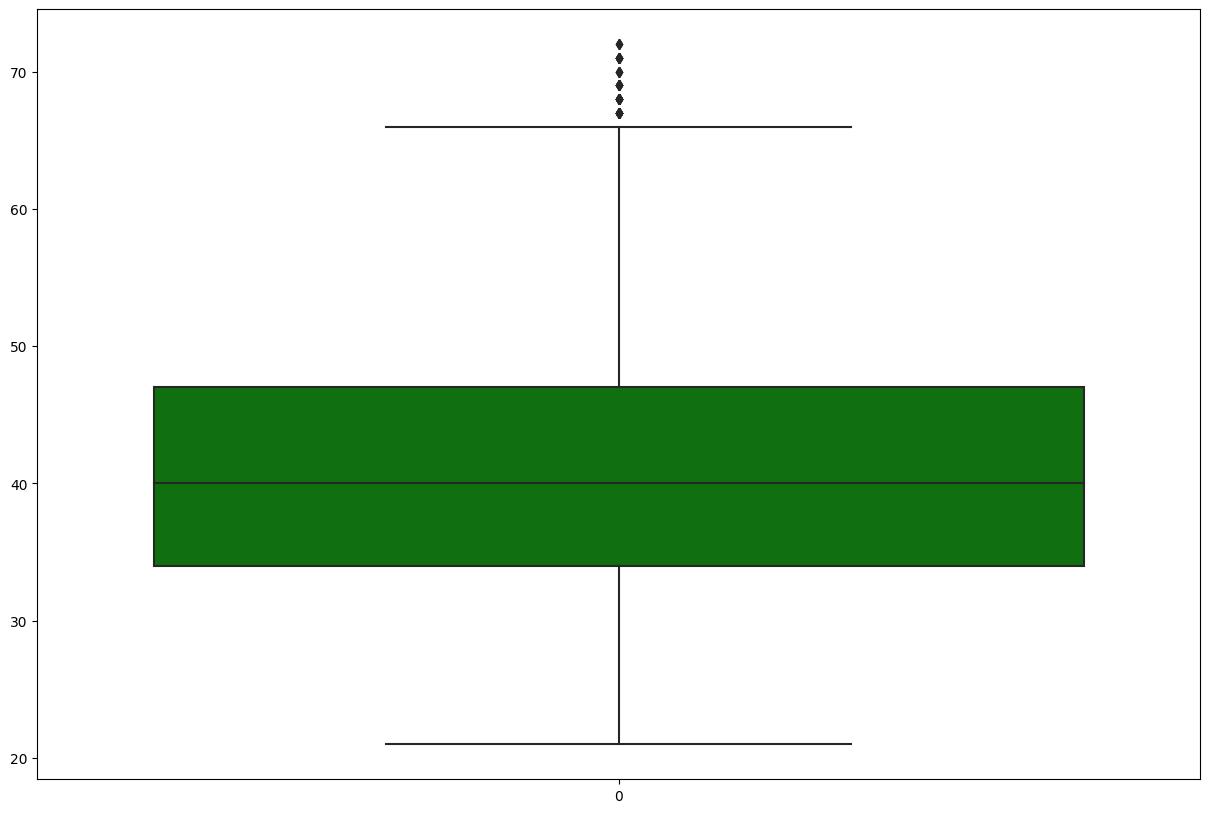

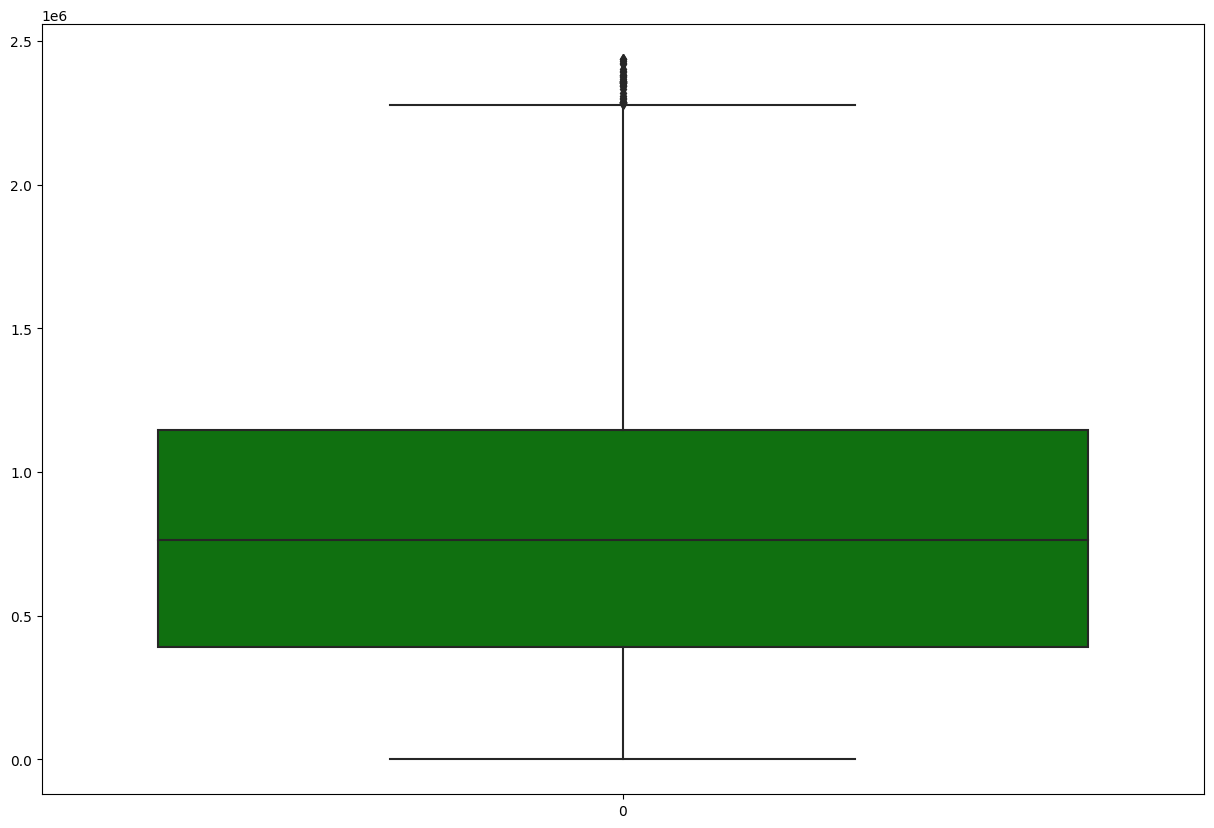

In [52]:
for i in ['Age', 'Balance']:
    plt.figure(figsize=(15,10))
    sns.boxplot(train[i], color='green')
    plt.show()

We identified that Age and Balance features do have a couple of outliers and since, all are beyond the upper limit we will consider the upper range only to detect the outliers in this scenario.

In [53]:
# Detecting the outliers
def upper_bound(df, feat):
    ''' Calculate InterQuartile Range(IQR) and the
    respective upper and lower bounds'''
    upper = lower = per25 = per75 = iqr = 0
    per25 = np.percentile(df[feat], 25)
    per75 = np.percentile(df[feat], 75)
    iqr = per75 - per25
    lower = per25 - (1.5*iqr)
    upper = per75 + (1.5*iqr)
    
    return upper

In [54]:
# Counting the outliers
print("Train: In Age", train[train['Age']>upper_bound(train, 'Age')].shape[0], ' In Balance: ', train[train['Balance']>upper_bound(train, 'Balance')].shape[0])
print("Test: In Age", test[test['Age']>upper_bound(test, 'Age')].shape[0], ' In Balance: ', test[test['Balance']>upper_bound(test, 'Balance')].shape[0])

Train: In Age 57  In Balance:  38
Test: In Age 25  In Balance:  18


In [55]:
# Replacing the outliers with the upper limit values
train['Age'] = train['Age'].apply(lambda x: round(upper_bound(train, 'Age')) if (x > upper_bound(train, 'Age')) else x)
test['Age'] = test['Age'].apply(lambda x: round(upper_bound(test, 'Age')) if (x > upper_bound(test, 'Age')) else x)

train['Balance'] = train['Balance'].apply(lambda x: round(upper_bound(train, 'Balance')) if (x > upper_bound(train, 'Balance')) else x)
test['Balance'] = test['Balance'].apply(lambda x: round(upper_bound(test, 'Balance')) if (x > upper_bound(test, 'Balance')) else x)

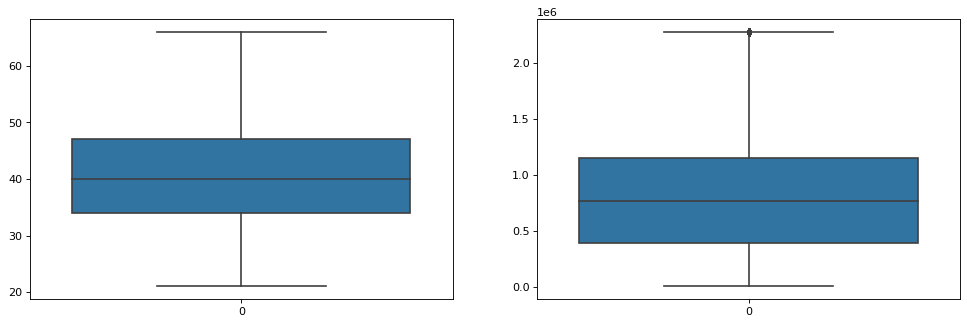

In [56]:
plt.figure(figsize=(15, 10), dpi=80)

plt.subplot(221)
sns.boxplot(train["Age"])

plt.subplot(222)
sns.boxplot(train["Balance"])
plt.show()

### 2.2 Exploratory Data Analysis

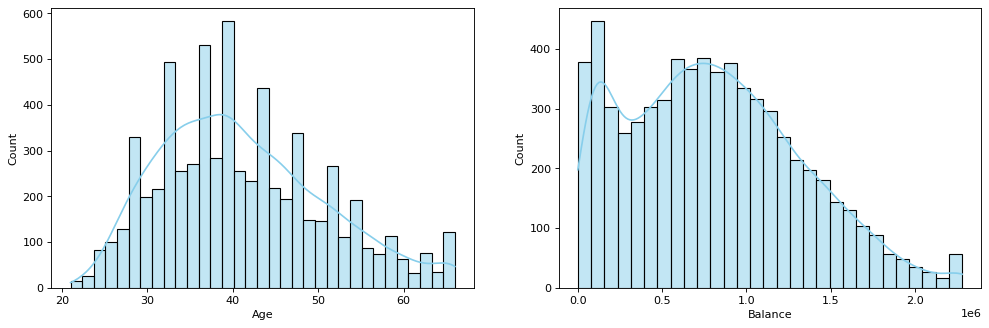

In [57]:
# Checking the skewness of the Age and Balance columns
plt.figure(figsize=(15, 10), dpi=80)

plt.subplot(221)
sns.histplot(train["Age"], kde=True, color = 'skyblue')

plt.subplot(222)
sns.histplot(train["Balance"], kde=True, color='skyblue')
plt.show()

Both features are positive/right skewed distribution.

In [58]:
# Listing the numerical features
num_features = [i for i in train.columns if train[i].dtype != 'object']

# Listing the categorical features
cat_features = [i for i in train.columns if train[i].dtype == 'object']

In [59]:
# Checking for groups within the categorical features
for i in cat_features:
    print(i)
    print(train[i].unique(), '\n')

Gender
['Female' 'Male'] 

Income
['5L - 10L' 'Less than 5L' 'More than 15L' '10L - 15L'] 

Product_Holdings
['1' '2' '3+'] 

Credit_Category
['Average' 'Poor' 'Good'] 



In [60]:
# Check how each feature relates with the target variable

def histplot(df, features):
    ''' Histplot of each feature with target variable '''
    for i in features:
        fig = px.histogram(train, x=i, color='Is_Churn', barmode='group', title='{} vs Churn'.format(i), height=400, width=700)
        fig.show()

histplot(train, cat_features)

We can make the following deductions:
1. Greater percentage of females are likely to churn
2. Higher Income customers with earnings greater than 10 Lakhs are more likely to churn
3. Almost equal number of customers have 1 to 2 products holdings. Also, there is no such distinction in churn rate based on number of product holdings.
4. Customers with poor credit ratings dominate the dataset and are also more likely to exit

In [61]:
px.scatter(data_frame=train, y='Income', x='Age', color='Is_Churn', size='Balance')

We see that elderly customers are hard to retain. Also, customers with high income are more likely to churn

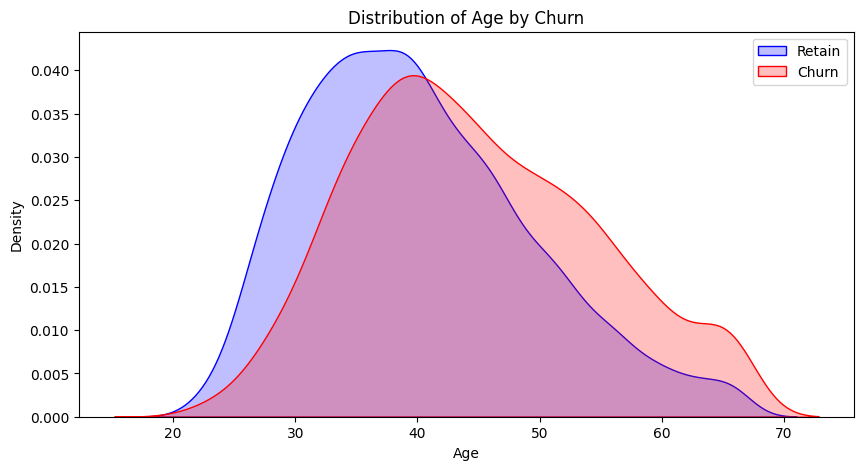

In [62]:
# Variation of churn rate with age of customers

plt.figure(figsize=(10,5))
ax = sns.kdeplot(train['Age'][(train['Is_Churn'] == 0)], color = 'Blue', shade=True)
ax = sns.kdeplot(train['Age'][(train['Is_Churn'] == 1)], color = 'Red', shade=True)

ax.legend(['Retain', 'Churn'], loc = 'upper right')
ax.set_ylabel("Density")
ax.set_xlabel('Age')
ax.set_title('Distribution of Age by Churn')
plt.show()

In [63]:
# Behaviour of customers in different credit categories

pd.set_option('display.float_format', lambda x: '%0.0f' % x)
df = train[['Credit_Category', 'Income', 'Gender', 'Balance']].groupby(['Credit_Category', 'Income', 'Gender']).sum().reset_index()

In [64]:
px.sunburst(df, path=['Credit_Category', 'Income', 'Gender'], color = 'Balance', values='Balance')


 From the sunburst, we can group the customers based on credit ratings, income and gender. It can be concluded that customers with high account balance tend to have poor credit ratings. Also it gives information about the account balances of customers based on their credit category, income and gender

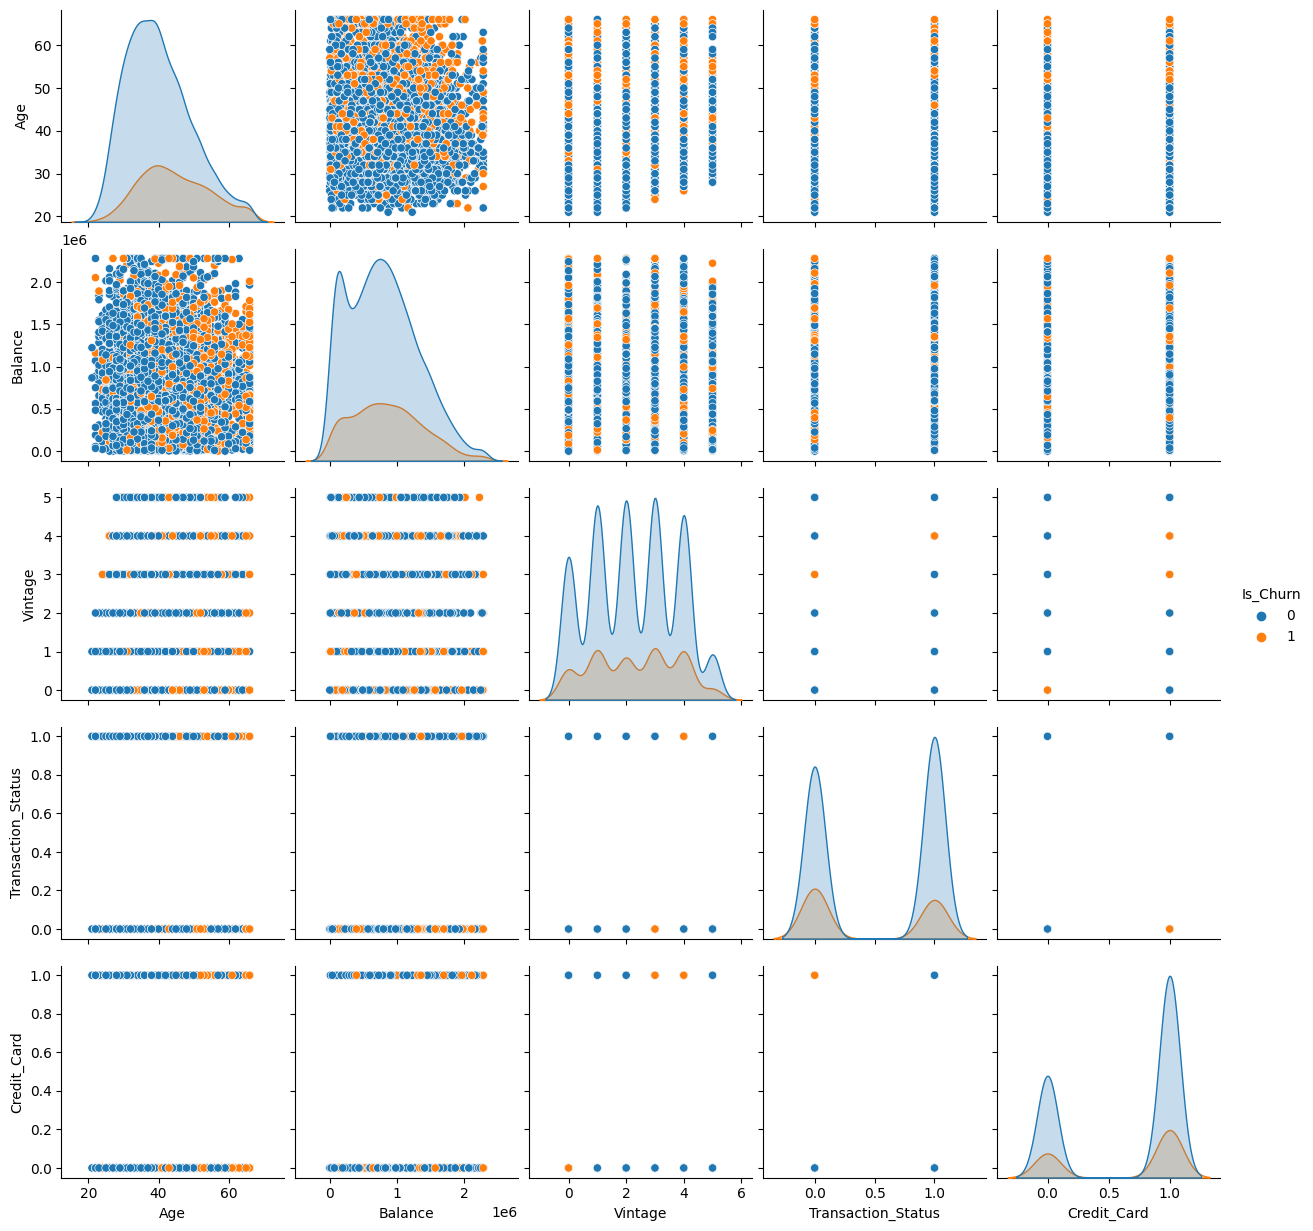

In [65]:
# Variation of each feature with respect to other features
sns.pairplot(train, hue='Is_Churn')
plt.show()

We can deduct the following from the plots:
1. No two feature has linear relation.
2. Elderly people are more likely to churn.
3. New customers who have been served for less than 2 years are more likely to churn.

In [67]:
train.head()

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,36,Female,5L - 10L,563266,4,0,1,0,Average,1
1,53,Female,Less than 5L,875572,2,1,1,1,Poor,0
2,35,Female,More than 15L,701607,2,1,2,0,Poor,0
3,43,Female,More than 15L,1393922,0,1,2,1,Poor,1
4,39,Female,More than 15L,893146,1,1,1,1,Good,1


In [68]:
train.head()

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,36,Female,5L - 10L,563266,4,0,1,0,Average,1
1,53,Female,Less than 5L,875572,2,1,1,1,Poor,0
2,35,Female,More than 15L,701607,2,1,2,0,Poor,0
3,43,Female,More than 15L,1393922,0,1,2,1,Poor,1
4,39,Female,More than 15L,893146,1,1,1,1,Good,1


In [69]:
numeric_columns = train.select_dtypes(include=[float, int])

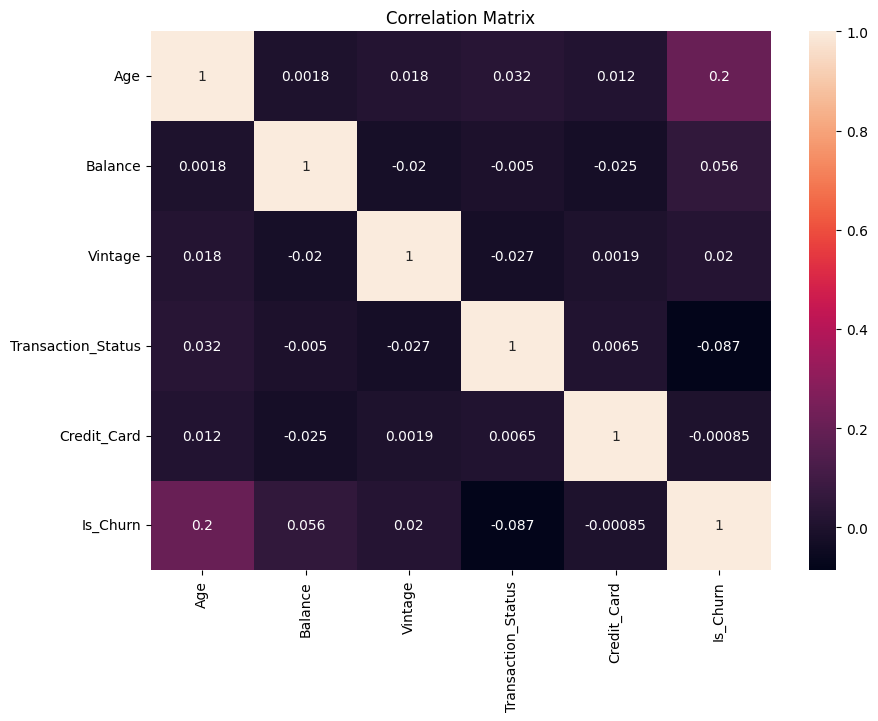

In [70]:
# Relationship strength among the features

plt.figure(figsize=(10,7))
sns.heatmap(numeric_columns.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

We can see that whether a customer leaves or not is determined by the Customer's Age followed by his transaction status and account balance.

In [72]:
# Percent of churned vs not-churned customers

labels = ['Exited', 'Retained']
values = [train.Is_Churn[train['Is_Churn']==1].count(), train.Is_Churn[train['Is_Churn']==0].count()]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0, 0.1], title='Proportion of customer churned and retained')])
fig.show()

We have imbalanced class in the target feature. Only 23% customers have churned

## 3. Data Preparation
In this phase, we will process, transform, and manipulate to create the final dataset for modeling. Features may be selected, and engineering new features might occur to improve the performance of the models.

### 3.1 Feature Engineering

In this section, we will alter the dataset to make it model ready. We are going to perform the following operations:

1. Encode Categorical Features.
2. Feature Scaling.
3. Imbalanced Dataset.
4. Feature Selection.

In [75]:
# import libraries

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

#### 3.1.1 Encoding
Models only understand numbers, hence it is crucial to conver the categorical features to numerical values. There are multiple ways of achieving this. For example Label Encoding isused in case of ordinal values in categorical feature whereas One-Hot encoding can be used for nominal values.

In [77]:
for i in cat_features:
    print(i)
    print(train[i].unique(), '\n')

Gender
['Female' 'Male'] 

Income
['5L - 10L' 'Less than 5L' 'More than 15L' '10L - 15L'] 

Product_Holdings
['1' '2' '3+'] 

Credit_Category
['Average' 'Poor' 'Good'] 



In [78]:
# Mapping Gender and Product Holdings values with numbers

train['Product_Holdings'] = train['Product_Holdings'].map({'1': 1, '2': 2, '3+': 3})
test['Product_Holdings'] = test['Product_Holdings'].map({'1': 1, '2': 2, '3+': 3})

train['Gender'] = train['Gender'].map({'Female': 0, 'Male': 1})
test['Gender'] = test['Gender'].map({'Female': 0, 'Male': 1})

In [79]:
train.head()

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,36,0,5L - 10L,563266,4,0,1,0,Average,1
1,53,0,Less than 5L,875572,2,1,1,1,Poor,0
2,35,0,More than 15L,701607,2,1,2,0,Poor,0
3,43,0,More than 15L,1393922,0,1,2,1,Poor,1
4,39,0,More than 15L,893146,1,1,1,1,Good,1


In [80]:
# Label Encoding Income and Credit Category

le_cols = ['Income', 'Credit_Category']

def LE(train, test):
    le = LabelEncoder()
    for col in le_cols:
            train[col] = le.fit_transform(train[col])
            test[col] = le.transform(test[col])
    return train, test

train_en, test_en = LE(train, test)

In [82]:
train.head()

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,36,0,1,563266,4,0,1,0,0,1
1,53,0,2,875572,2,1,1,1,2,0
2,35,0,3,701607,2,1,2,0,2,0
3,43,0,3,1393922,0,1,2,1,2,1
4,39,0,3,893146,1,1,1,1,1,1


#### 3.1.2 Scaling
 The idea behind scaling is to bring down all the values in a feature within a certain range. Here, we have used MinMax scaler on Vintage feature to squeeze all the values in the range of 0-1.

In [83]:
train['Vintage'].unique()

array([4, 2, 0, 1, 3, 5], dtype=int64)

In [85]:
# Scaling the data
scaler = MinMaxScaler()
num_features = ['Vintage', 'Age', 'Balance']

train[num_features] = scaler.fit_transform(train[num_features])
test[num_features] = scaler.transform(test[num_features])

train.head(10)

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,0,0,1,0,1,0,1,0,0,1
1,1,0,2,0,0,1,1,1,2,0
2,0,0,3,0,0,1,2,0,2,0
3,0,0,3,1,0,1,2,1,2,1
4,0,0,3,0,0,1,1,1,1,1
5,0,0,2,0,1,1,1,0,1,0
6,1,1,2,0,0,1,2,1,0,0
7,0,0,0,1,1,0,1,1,2,1
8,1,0,0,1,0,0,1,1,2,1
9,0,0,1,0,1,0,1,1,2,0


#### 3.1.3 Handling Imbalancing in the dataset

In case of classification problems we should ensure the distribution of the classes in target feature. As the customers churned are quite less in number in the dataset, we need to adjust and balance the classes (churn vs not_churned). There are 2 techniques by which this can be achieved: 
1. Over-sampling. 
2. Under Sampling.

In imbalanced datasets, where one class has significantly fewer samples than the other(s), traditional machine learning algorithms can be biased toward the majority class, leading to poor performance on the minority class. 

In [87]:
# Using Synthetic Minority Over-Sampling Technique (SMOTE)
X = train.drop('Is_Churn', axis=1)
y = train['Is_Churn']

sm = SMOTE(sampling_strategy = 'minority', k_neighbors = 1, random_state = 42)
x_train_miss, y_train_miss = sm.fit_resample(X, y.ravel())

x_train, x_test, y_train, y_test = train_test_split(x_train_miss, y_train_miss, test_size=0.3, random_state=42)

In [88]:
# Using Adaptive Synthetic Sampling (ADASYN)
X = train.drop('Is_Churn', axis=1)
y = train['Is_Churn']

ad = ADASYN(sampling_strategy = 'minority', n_neighbors = 5, random_state = 140)
x_train_miss, y_train_miss = ad.fit_resample(X, y.ravel())

x_train, x_test, y_train, y_test = train_test_split(x_train_miss, y_train_miss, test_size=0.3, random_state=42)

## 4. Modelling
 The goal in this phase is to build and test different models to find the one that best addresses the business objectives. This may involve training and evaluating multiple models to determine the most suitable one.

In [91]:
# importing libraries for modelling

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegressionCV, SGDClassifier, RidgeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier

In [92]:
# Function to print the classification Report

def model_score(model):
    '''To print classification report and confusion matrix for each model'''
    y_pred = model.predict(x_test)
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.set_context('talk')
    sns.heatmap(cm, annot=True, fmt='d')
    plt.show()

### 4.1 Logistic Regression

              precision    recall  f1-score   support

           0       0.62      0.66      0.64      1567
           1       0.59      0.55      0.57      1411

    accuracy                           0.61      2978
   macro avg       0.61      0.61      0.61      2978
weighted avg       0.61      0.61      0.61      2978



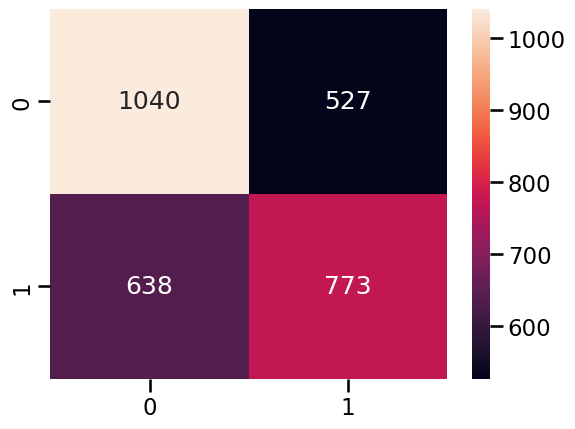

In [93]:
lg = LogisticRegressionCV(penalty='l2', solver='sag', cv=5, max_iter=2000)

lg.fit(x_train, y_train)

model_score(lg)

### 4.2 Random Forest

In [100]:
# # Cross Validating to get the best hyperparameters

# params = {'max_depth':[3, 5, 10, 13], 
#           'n_estimators':[100, 200, 400, 600, 900],
#           'max_features':[2, 4, 6, 8, 10]}

# model = RandomForestClassifier()
# gs = GridSearchCV(
#         estimator=model,
#         param_grid=params, 
#         cv=3, 
#         n_jobs=-1, 
#         scoring='f1',
#         verbose=2
#     )
# fitted_model = gs.fit(x_train, y_train)
# fitted_model.best_estimator_

              precision    recall  f1-score   support

           0       0.77      0.89      0.82      1567
           1       0.85      0.71      0.77      1411

    accuracy                           0.80      2978
   macro avg       0.81      0.80      0.80      2978
weighted avg       0.81      0.80      0.80      2978



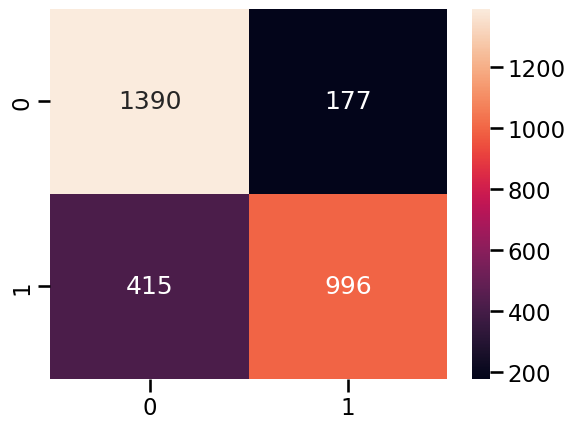

In [94]:
rf= RandomForestClassifier(max_depth=13, max_features=8, n_estimators=400, bootstrap=True, min_samples_leaf=3, min_samples_split=5)
rf.fit(x_train,y_train)

model_score(rf)

### 4.3 Comparing the Models

In [95]:
# calculating the false positive and true positive rate for each of the models
fpr1, tpr1, thresh1 = roc_curve(y_test, lg.predict_proba(x_test)[:, 1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, rf.predict_proba(x_test)[:, 1], pos_label=1)

In [96]:
# Fething the Area under the curve 
auc_score1 = roc_auc_score(y_test, lg.predict_proba(x_test)[:, 1])
auc_score3 = roc_auc_score(y_test, rf.predict_proba(x_test)[:, 1])

print("Logistic Regression: ", auc_score1)
print("Random Forest: ", auc_score3)

Logistic Regression:  0.6539189529618907
Random Forest:  0.8659615375047998


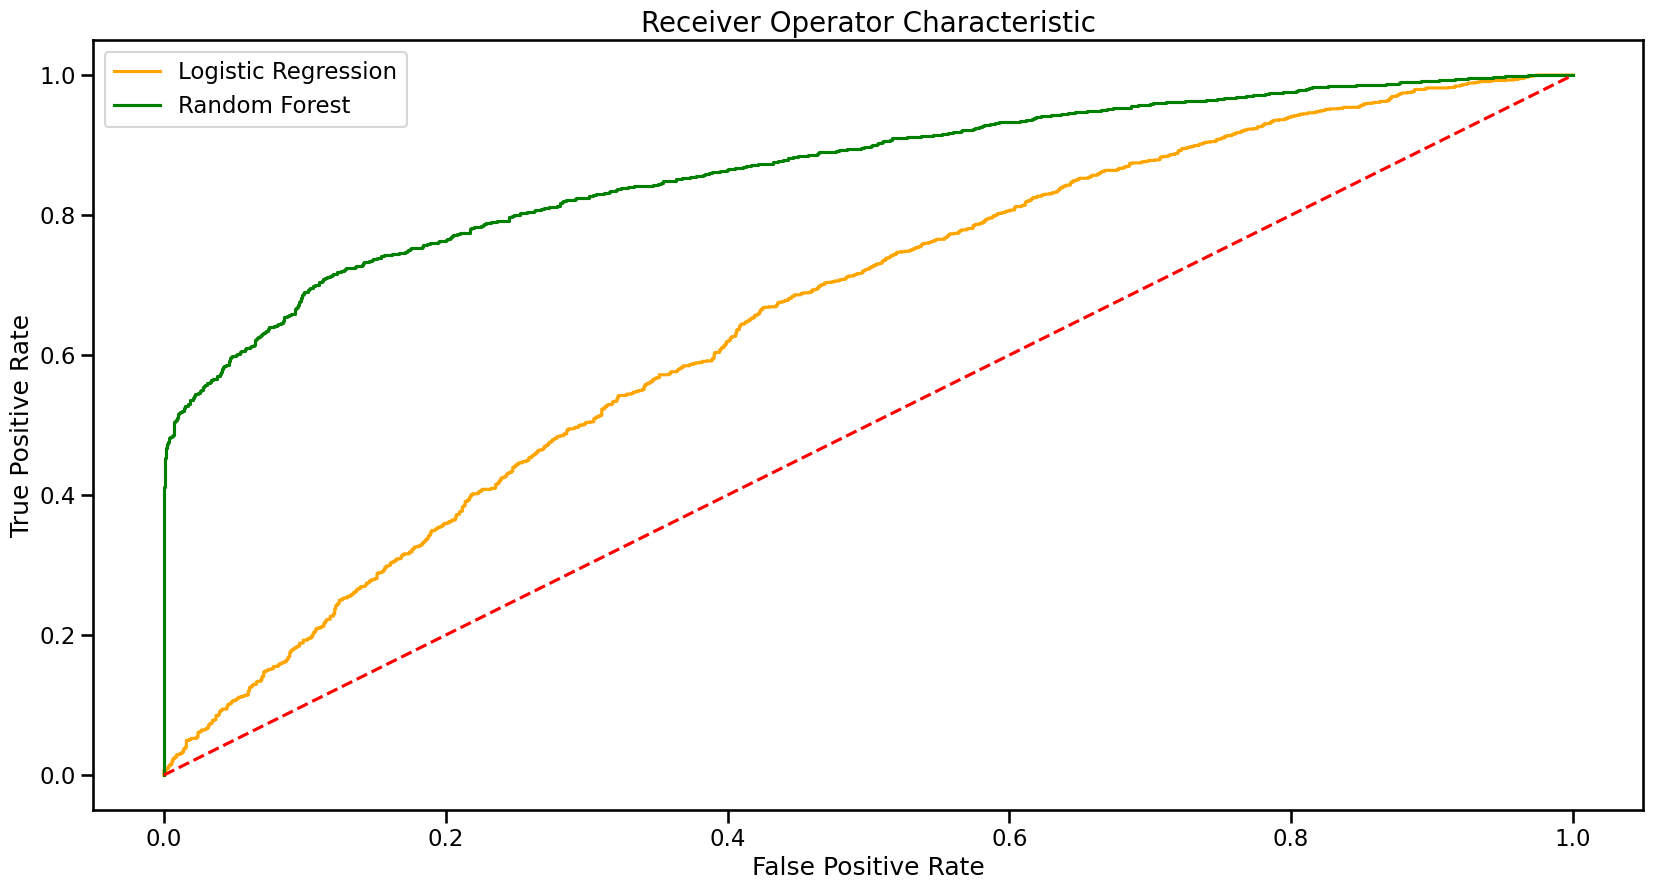

In [97]:
# Plotting ROC curve
plt.figure(figsize=(20,10))
plt.plot(fpr1, tpr1,  color = 'orange', label='Logistic Regression')
plt.plot(fpr3, tpr3, color = 'green', label='Random Forest')
         
plt.title('Receiver Operator Characteristic', fontsize=20)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1],'r--') 
plt.legend(loc = 'best')
plt.show()

### 4.4 Feature Importance 

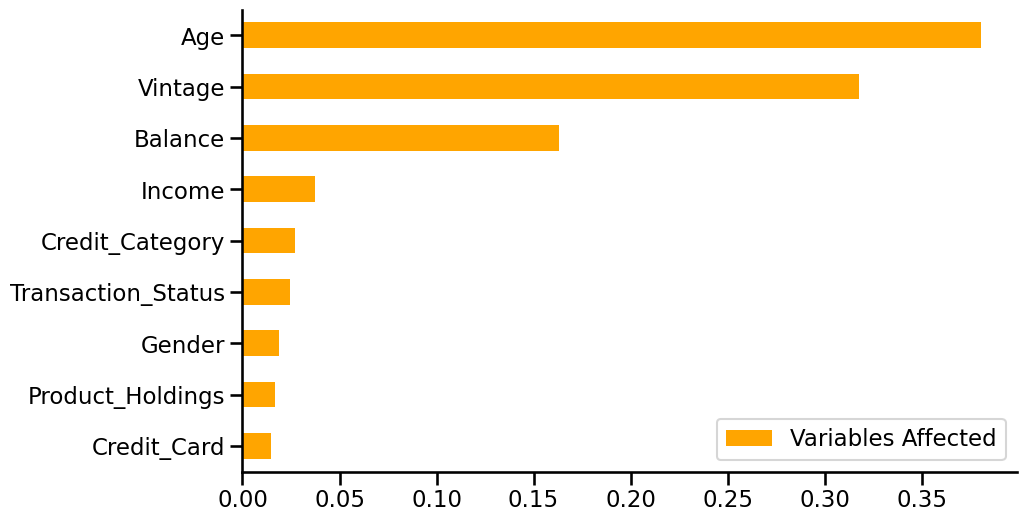

In [98]:
feat_scores = pd.DataFrame({'Variables Affected': rf.feature_importances_}, index=X.columns)
feat_scores = feat_scores.sort_values(by = 'Variables Affected')
feat_scores.plot(kind = 'barh', figsize=(10,6), color='orange')
sns.despine()